In [55]:
from skimage.metrics import structural_similarity as compare_ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

result = []

def compare_images(imageA, imageB, title):
	s = compare_ssim(imageA, imageB)

	fig = plt.figure(title)
	plt.suptitle(title + " SSIM: %.2f" % (s))

	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")

	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")

	# show the images
	plt.show()

In [69]:
def save_result(depth):
    result = np.zeros((4, 7))
    for index in range(7):
        spp = 2 ** index
        golden = cv2.imread(f"images{depth}depth/Uniform10000spp.png")
        uniform = cv2.imread(f"images{depth}depth/Uniform{spp}spp.png")
        halton = cv2.imread(f"images{depth}depth/Halton{spp}spp.png")
        sobol = cv2.imread(f"images{depth}depth/Sobol{spp}spp.png")
        blue_noise = cv2.imread(f"images{depth}depth/BlueNoise{spp}spp.png")

        # convert the images to grayscale
        golden = cv2.cvtColor(golden, cv2.COLOR_BGR2GRAY)
        uniform = cv2.cvtColor(uniform, cv2.COLOR_BGR2GRAY)
        halton = cv2.cvtColor(halton, cv2.COLOR_BGR2GRAY)
        sobol = cv2.cvtColor(sobol, cv2.COLOR_BGR2GRAY)
        blue_noise = cv2.cvtColor(blue_noise, cv2.COLOR_BGR2GRAY)

        result[0][index] = compare_ssim(golden, uniform)
        result[1][index] = compare_ssim(golden, halton)
        result[2][index] = compare_ssim(golden, sobol)
        result[3][index] = compare_ssim(golden, blue_noise)

    spps = [1, 2, 4, 8, 16, 32, 64]
    plt.figure(figsize=(15, 12))
    plt.title('Difference SSIM')
    plt.plot(spps, result[0], 'r', spps, result[1], 'g', spps, result[2], 'y', spps, result[3], 'b', linewidth=1)
    plt.legend(['uniform','halton','sobol', 'blue_noise'], loc=1)
    plt.savefig(f"{depth}depth_difference1-64spp.png")



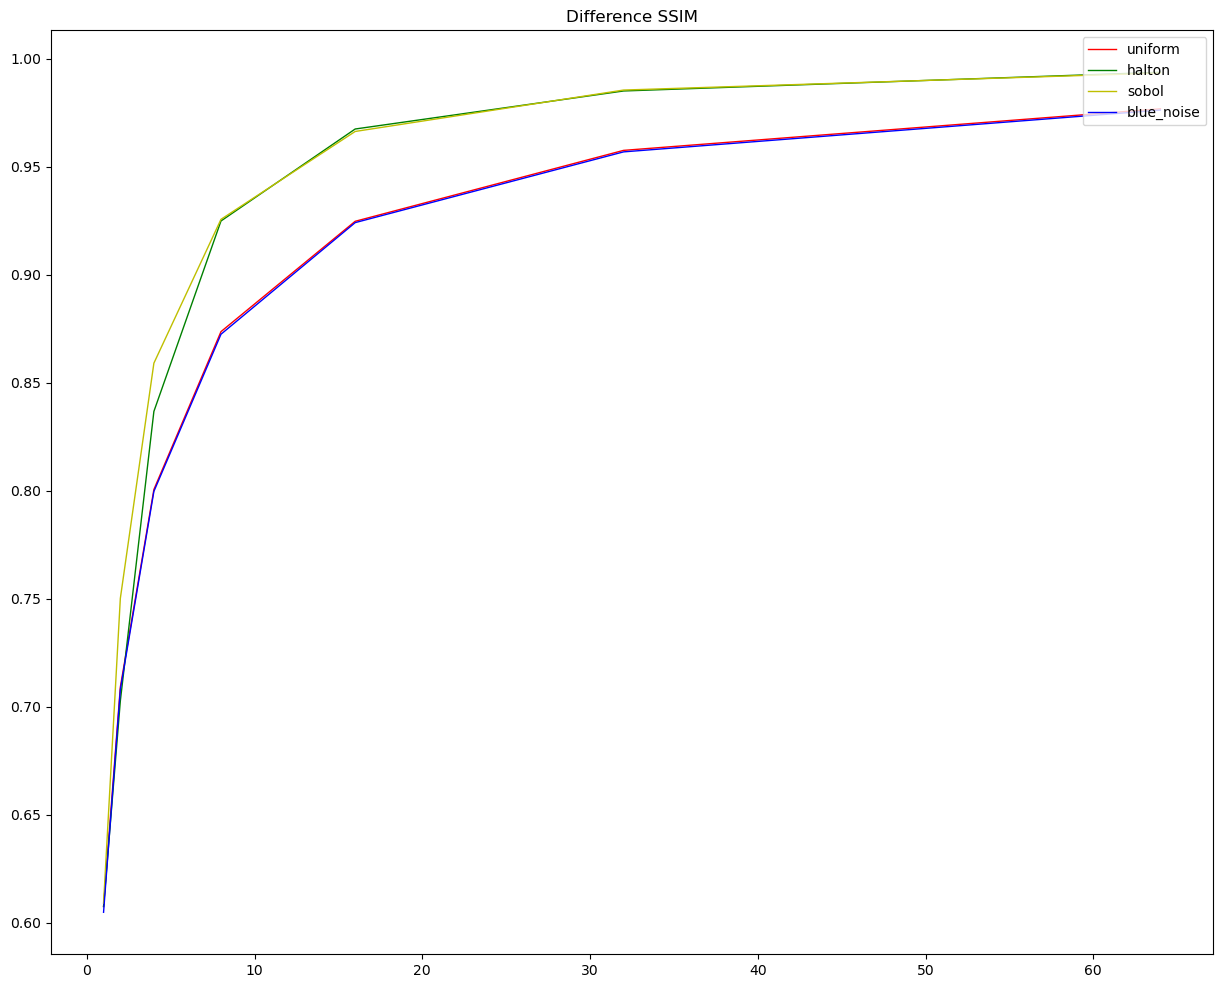

In [71]:
save_result(1)

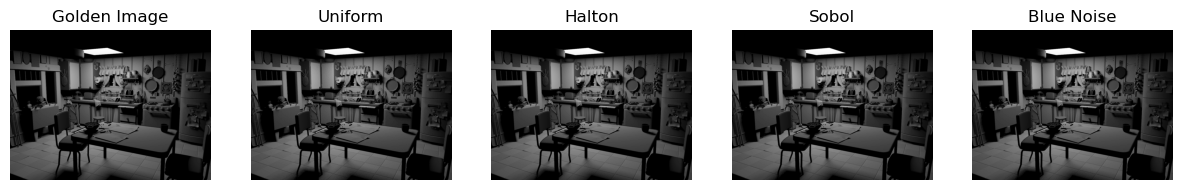

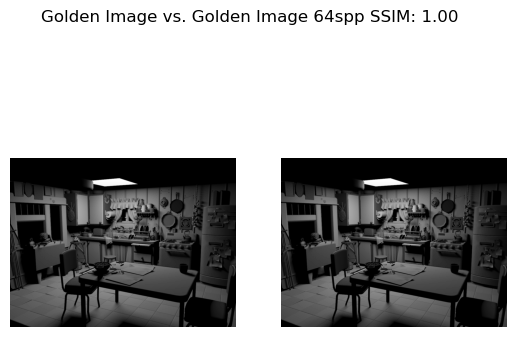

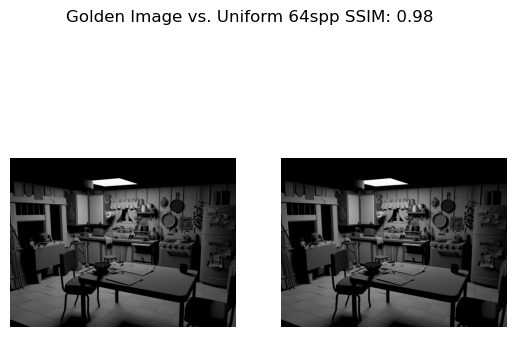

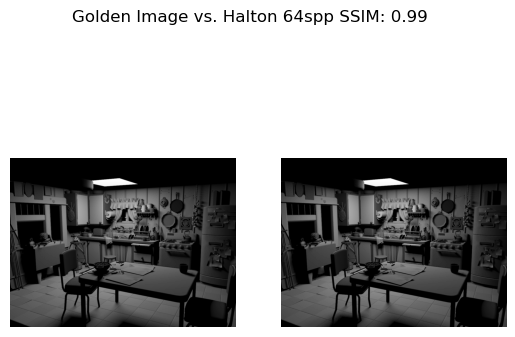

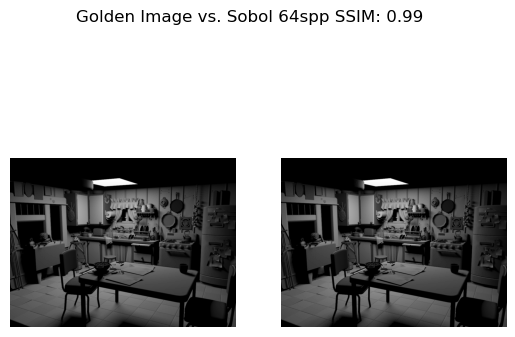

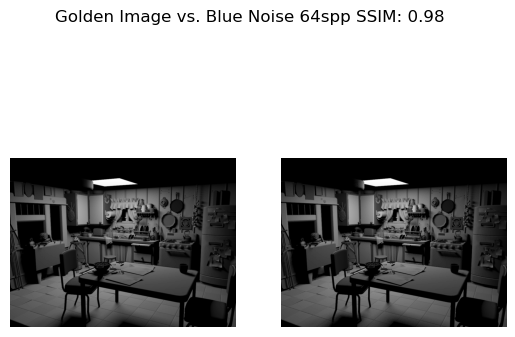

In [62]:
spp = 64
depth = 1
golden = cv2.imread(f"images{depth}depth/Uniform10000spp.png")
uniform = cv2.imread(f"images{depth}depth/Uniform{spp}spp.png")
halton = cv2.imread(f"images{depth}depth/Halton{spp}spp.png")
sobol = cv2.imread(f"images{depth}depth/Sobol{spp}spp.png")
blue_noise = cv2.imread(f"images{depth}depth/BlueNoise{spp}spp.png")

# convert the images to grayscale
golden = cv2.cvtColor(golden, cv2.COLOR_BGR2GRAY)
uniform = cv2.cvtColor(uniform, cv2.COLOR_BGR2GRAY)
halton = cv2.cvtColor(halton, cv2.COLOR_BGR2GRAY)
sobol = cv2.cvtColor(sobol, cv2.COLOR_BGR2GRAY)
blue_noise = cv2.cvtColor(blue_noise, cv2.COLOR_BGR2GRAY)

fig = plt.figure("Images", (15, 20))
images = ("Golden Image", golden), ("Uniform", uniform), ("Halton", halton), ("Sobol", sobol), ("Blue Noise", blue_noise)

for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 5, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")

plt.show()

# compare the images
compare_images(golden, golden, f"Golden Image vs. Golden Image {spp}spp")
compare_images(golden, uniform, f"Golden Image vs. Uniform {spp}spp")
compare_images(golden, halton, f"Golden Image vs. Halton {spp}spp")
compare_images(golden, sobol, f"Golden Image vs. Sobol {spp}spp")
compare_images(golden, blue_noise, f"Golden Image vs. Blue Noise {spp}spp")